<h1>AirBnB Boston Analysis</h1>

<br>

<p>For this analysis I will answer the following 3 questions:</p>
<ul>
  <li>What are the price distributions for each type of room? </li>
  <li>What are the features that highly correlate to price? </li>
  <li>What are the most expensive zipcodes in Boston?</li>
</ul>    

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Notebook options
pd.options.display.max_rows = 99999
pd.options.display.max_columns = 99999
pd.options.display.float_format = '{:20,.3f}'.format

## Get the data

In [2]:
path_to_data = "/Users/dgrijalva/udacity/DataScience/Projects/BlogPost/boston-airbnb-open-data"

In [3]:
calendar = pd.read_csv('{}/calendar.csv'.format(path_to_data))
listings = pd.read_csv('{}/listings.csv'.format(path_to_data))
reviews = pd.read_csv('{}/reviews.csv'.format(path_to_data))

In [37]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,nan,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.283,-71.133,t,House,Entire home/apt,4,1.500,2.000,3.000,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",nan,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,nan,0,0,0,0,2016-09-06,0,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,f,nan,nan,f,moderate,f,f,1,nan
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

## Clean and explore the data

In [4]:
def summary(data):
    """ Provides a summary of the dataset
    It prints the shape of the dataset and the percentage of missing values for each column.
    """
    print('Shape: {}'.format(data.shape))
    print((data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100)

In [5]:
summary(calendar)

Shape: (1308890, 4)
price                 50.872
dtype: float64


In [6]:
summary(listings)

Shape: (3585, 95)
summary                                       3.989
space                                        29.484
neighborhood_overview                        39.470
notes                                        55.091
transit                                      35.983
access                                       41.534
interaction                                  43.347
house_rules                                  33.250
thumbnail_url                                16.709
medium_url                                   16.709
xl_picture_url                               16.709
host_location                                 0.307
host_about                                   36.513
host_response_time                           13.138
host_response_rate                           13.138
host_acceptance_rate                         13.138
host_neighbourhood                            9.456
neighbourhood                                15.146
neighbourhood_group_cleansed                10

In [7]:
summary(reviews)

Shape: (68275, 6)
comments                  0.078
dtype: float64


In [8]:
# lets clean data

columns_to_keep = ['id', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
                    'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude', 'property_type', 'room_type',
                   'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'reviews_per_month']

new_listings = listings[columns_to_keep].copy()
def clean_prices(x):
    """Cleans the price colums
    transform data from $2,000 to 2000
    """
    x = float(x[1:].replace(',',''))
    return x


def clean_percentages(x):
    """ cleans the percentages columns
    transforms data from 20% to 0.20
    """
    x = float(x[:-1])/100
    return x


    
def clean_zipcode(x):
    """cleans the zip code columns
    Makes sures each zip code only has 5 digets and converts it to a interger
    """
    x = x[:5]
    return int(x)

In [9]:
print(new_listings.shape)
new_listings.isnull().sum()[new_listings.isnull().sum()>0]

(3585, 18)


host_response_time      471
host_response_rate      471
host_acceptance_rate    471
zipcode                  38
property_type             3
bathrooms                14
bedrooms                 10
beds                      9
reviews_per_month       756
dtype: int64

In [10]:
new_listings = new_listings.dropna()
new_listings.shape

(2546, 18)

In [11]:
new_listings['zipcode'] = new_listings['zipcode'].apply(lambda x: clean_zipcode(x))
new_listings['price'] = new_listings['price'].apply(lambda x: clean_prices(x))
new_listings['host_response_rate'] = new_listings['host_response_rate'].apply(lambda x: clean_percentages(x))
new_listings['host_acceptance_rate'] = new_listings['host_acceptance_rate'].apply(lambda x: clean_percentages(x))

In [12]:
new_listings.replace({'within an hour': 0,
                         'within a few hours': 1,
                         'within a day': 2,
                         'a few days or more': 3}, inplace=True)

new_listings.replace({'Entire home/apt': 0, 
                       'Shared room':1, 
                       'Private room':2}, inplace=True)

new_listings.replace({'Apartment':0,
 'Bed & Breakfast':1,
 'Boat':2,
 'Condominium':3,
 'Dorm':4,
 'Entire Floor':5,
 'Guesthouse':6,
 'House':7,
 'Loft':8,
 'Other':9,
 'Townhouse':10,
 'Villa':11}, inplace=True)

new_listings.replace({'Allston':0,
 'Back Bay':1,
 'Bay Village':2,
 'Beacon Hill':3,
 'Brighton':4,
 'Charlestown':5,
 'Chinatown':6,
 'Dorchester':7,
 'Downtown':8,
 'East Boston':9,
 'Fenway':10,
 'Hyde Park':11,
 'Jamaica Plain':12,
 'Leather District':13,
 'Longwood Medical Area':14,
 'Mattapan':15,
 'Mission Hill':16,
 'North End':17,
 'Roslindale':18,
 'Roxbury':19,
 'South Boston':20,
 'South Boston Waterfront':21,
 'South End':22,
 'West End':23,
 'West Roxbury':24},inplace=True)

In [13]:
new_listings.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,reviews_per_month
1,3075044,0,1.000,1.000,f,18,2131,42.286,-71.134,0,2,2,1.000,1.000,1.000,65.000,2,1.300
2,6976,1,1.000,0.880,t,18,2131,42.292,-71.136,0,2,2,1.000,1.000,1.000,65.000,3,0.470
4,7651065,0,1.000,1.000,t,18,2131,42.285,-71.136,7,2,2,1.500,1.000,2.000,79.000,2,2.250
5,12386020,1,1.000,0.950,t,18,2131,42.292,-71.132,3,2,2,1.000,1.000,1.000,75.000,2,1.700
6,5706985,0,0.980,0.960,f,18,2131,42.281,-71.131,0,0,3,1.000,1.000,2.000,100.000,1,4.000


## Question 1 

<p> What are the price distributions for each type of room?</p>

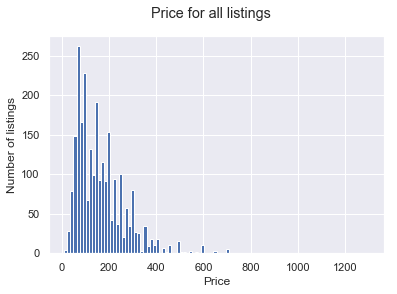

In [55]:
new_listings['price'].hist(bins=100);
plt.suptitle("Price for all listings");   
plt.xlabel('Price');
plt.ylabel('Number of listings');


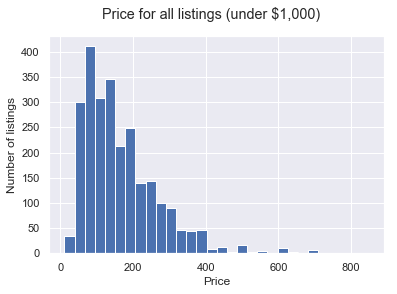

In [61]:
new_listings[new_listings['price'] <1000].price.hist(bins=30);
plt.suptitle("Price for all listings (under $1,000)");   
plt.xlabel('Price');
plt.ylabel('Number of listings');


In [57]:
room_types = list(set(new_listings['room_type']))
room_types

[0, 1, 2]

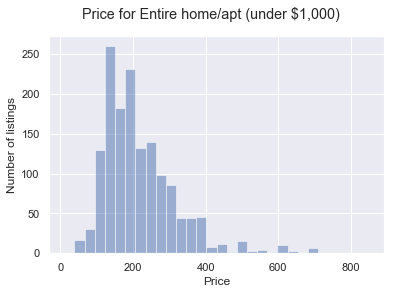

In [62]:
new_listings[(new_listings['price'] <1000) & (new_listings['room_type'] == room_types[0])].price.hist(bins=30, alpha=0.5);                                                                                            
plt.suptitle("Price for Entire home/apt (under $1,000)");   
plt.xlabel('Price');
plt.ylabel('Number of listings');


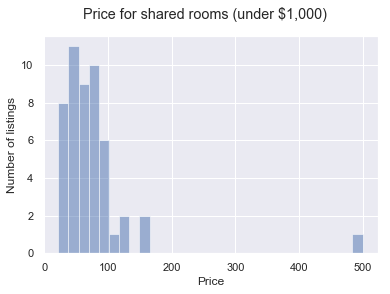

In [63]:
new_listings[(new_listings['price'] <1000) & (new_listings['room_type'] == room_types[1])].price.hist(bins=30, alpha=0.5);
plt.suptitle("Price for shared rooms (under $1,000)");
plt.xlabel('Price');
plt.ylabel('Number of listings');




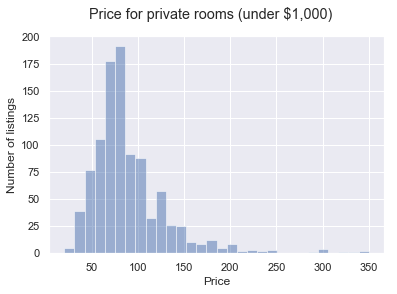

In [64]:
new_listings[(new_listings['price'] <1000) & (new_listings['room_type'] == room_types[2])].price.hist(bins=30, alpha=0.5);
plt.suptitle("Price for private rooms (under $1,000)");
plt.xlabel('Price');
plt.ylabel('Number of listings');


In [20]:
def roomType_price_ranges(df, room_type):
    """This funcion helps analyze the price for each room type
    It out puets the highest price, the lowerst price and the difference between the highest and the lowerst price
    """
    if room_type == 0:
        df = df[df['room_type']==0]
    elif room_type == 1:
        df = df[df['room_type']==1]    
    elif room_type == 2:
        df = df[df['room_type']==2]
    return df['price'].max(), df['price'].min(), df['price'].max()-df['price'].min()


In [21]:
for i in set(new_listings['room_type']):
    high, low, spread = roomType_price_ranges(new_listings,i)
    print('Room Type: {}'.format(i))
    print('High:{:,}'.format(high))
    print('Low:{:,}'.format(low))
    print('Spread:{:,}\n'.format(spread))
    

Room Type: 0
High:1,300.0
Low:11.0
Spread:1,289.0

Room Type: 1
High:500.0
Low:22.0
Spread:478.0

Room Type: 2
High:350.0
Low:20.0
Spread:330.0



<p>There is a share room that has a price of $750. Lets fin out in what neighbourhood this room is. </p>

In [22]:
new_listings[(new_listings['room_type']==1) & (new_listings['price']==750)]

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,reviews_per_month


## Question 2 

<p>What are the features that highly correlate to price?</p>

Text(0.5, 1.0, 'Reviews per month vs price')

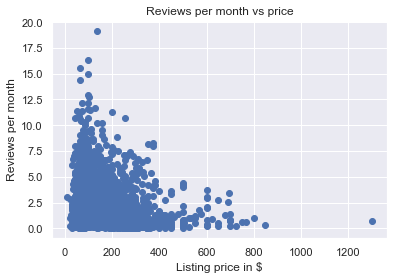

In [31]:
plt.scatter(new_listings['price'],new_listings['reviews_per_month'])
plt.ylabel('Reviews per month')
plt.xlabel('Listing price in $')
plt.title('Reviews per month vs price')

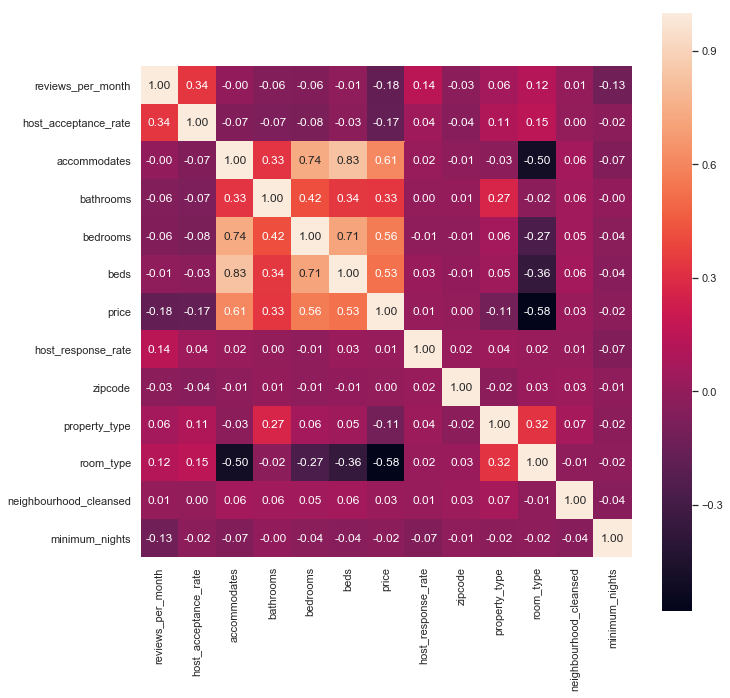

In [34]:
cols = ['reviews_per_month','host_acceptance_rate','accommodates',
       'bathrooms','bedrooms','beds','price', 'host_response_rate','zipcode', 'property_type',
       'room_type', 'neighbourhood_cleansed','minimum_nights']


corrs = np.corrcoef(new_listings[cols].values.T)
fig, ax = plt.subplots(figsize=(11,11))
sns.set(font_scale=1)
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = cols, xticklabels = cols)

<p>The features that highly correlate with price are:</p>
<ul>
<li>Accomodates</le>
<li>Bedrooms</li>
<li>Beds</li>
</ul>

## Question 3 

<p>What are the most expensive zipcodes in Boston?</p>

In [36]:
new_listings[(new_listings['price'] == 1300)].zipcode

1022    2118
Name: zipcode, dtype: int64

In [65]:
new_listings[(new_listings['price'] == 1300)]

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,reviews_per_month
1022,8303267,1,1.000,0.830,t,22,2118,42.342,-71.075,7,0,8,4.500,5.000,6.000,"1,300.000",5,0.750


In [81]:
new_listings['price'].describe()

count              2,546.000
mean                 167.381
std                  111.203
min                   11.000
25%                   85.000
50%                  146.500
75%                  219.000
max                1,300.000
Name: price, dtype: float64

In [95]:
mean = np.mean(new_listings['price'])
percentile = np.percentile(new_listings['price'], 98)
print(percentile)
new_listings[(new_listings['price'] > percentile) ][['price', 'zipcode']]

500.0


,price,zipcode
297,750.000,2130
317,550.000,2130
379,525.000,2130
391,725.000,2130
811,536.000,2119
889,650.000,2120
894,625.000,2119
937,525.000,2118
982,600.000,2118
1022,"1,300.000",2118


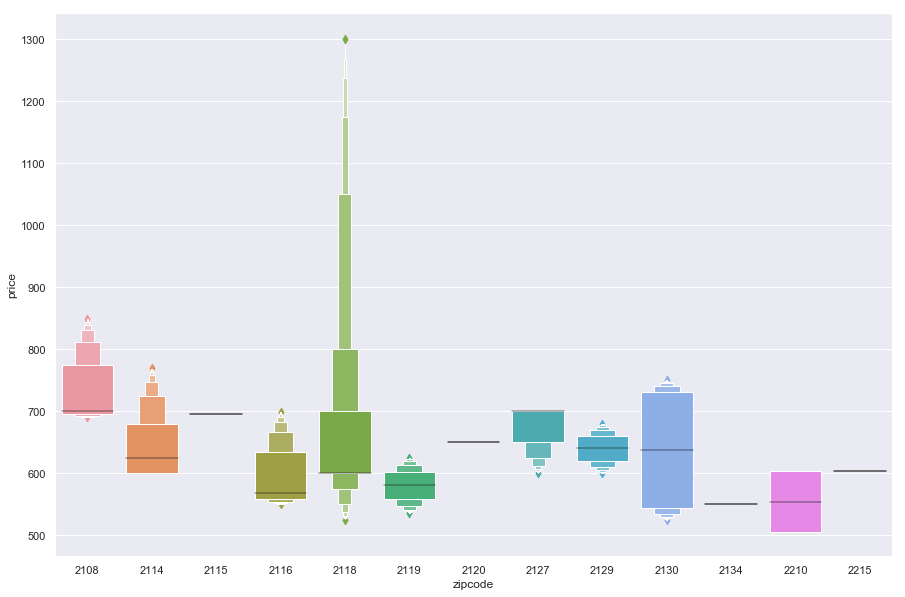

In [99]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxenplot(y.zipcode, y.price);